In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_pickle('../../Data/Mobile/train.pkl')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 28 columns):
id                  float32
click               uint8
C1                  uint16
banner_pos          uint8
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type         uint8
device_conn_type    uint8
C14                 uint16
C15                 uint16
C16                 uint16
C17                 uint16
C18                 uint8
C19                 uint16
C20                 int32
C21                 uint16
day                 uint8
hour                uint8
weekday             uint8
hourmean            float32
weekdayport         float32
dtypes: float32(3), int32(1), object(9), uint16(7), uint8(8)
memory usage: 4.1+ GB


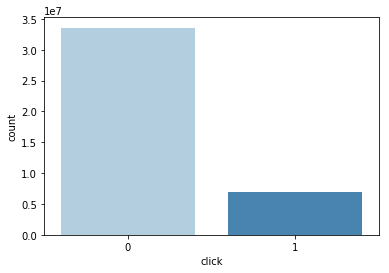

In [76]:
sns.countplot(df['click'], palette='Blues')

In [67]:
listofportions = list(df['weekdayport'].unique())
listofportions

[0.16182836890220642,
 0.1569141447544098,
 0.1754574030637741,
 0.1747158169746399,
 0.18240194022655487,
 0.18304894864559174,
 0.18159416317939758]

769836

In [72]:
# Undersampling but keeping the same portion of weekday clickrate

listofportions = list(df['weekdayport'].unique())

mon = int(len(df[(df.weekday==0) & (df.click==1)]) * (1.8 - listofportions[0]*3))
tues = int(len(df[(df.weekday==1) & (df.click==1)]) * (1.8 - listofportions[1]*3))
wed = int(len(df[(df.weekday==2) & (df.click==1)]) * (1.8 - listofportions[2]*3))
thurs = int(len(df[(df.weekday==3) & (df.click==1)]) * (1.8 - listofportions[3]*3))
fri = int(len(df[(df.weekday==4) & (df.click==1)]) * (1.8 - listofportions[4]*3))
sat = int(len(df[(df.weekday==5) & (df.click==1)]) * (1.8 - listofportions[5]*3))
sun = int(len(df[(df.weekday==6) & (df.click==1)]) * (1.8 - listofportions[6]*3))

mon_index = np.array(df[(df.weekday==0) & (df.click==1)].index)
tues_index = np.array(df[(df.weekday==1) & (df.click==1)].index)
wed_index = np.array(df[(df.weekday==2) & (df.click==1)].index)
thurs_index = np.array(df[(df.weekday==3) & (df.click==1)].index)
fri_index = np.array(df[(df.weekday==4) & (df.click==1)].index)
sat_index = np.array(df[(df.weekday==5) & (df.click==1)].index)
sun_index = np.array(df[(df.weekday==6) & (df.click==1)].index)

mon_index0 = np.array(df[(df.weekday==0) & (df.click==0)].index)
tues_index0 = np.array(df[(df.weekday==1) & (df.click==0)].index)
wed_index0 = np.array(df[(df.weekday==2) & (df.click==0)].index)
thurs_index0 = np.array(df[(df.weekday==3) & (df.click==0)].index)
fri_index0 = np.array(df[(df.weekday==4) & (df.click==0)].index)
sat_index0 = np.array(df[(df.weekday==5) & (df.click==0)].index)
sun_index0 = np.array(df[(df.weekday==6) & (df.click==0)].index)

rand_mon = np.random.choice(mon_index0, mon, replace = False)
rand_mon = np.array(rand_mon)

rand_tues = np.random.choice(tues_index0, tues, replace = False)
rand_tues = np.array(rand_tues)

rand_wed = np.random.choice(wed_index0, wed, replace = False)
rand_wed = np.array(rand_wed)

rand_thurs = np.random.choice(thurs_index0, thurs, replace = False)
rand_thurs = np.array(rand_thurs)

rand_fri = np.random.choice(fri_index0, fri, replace = False)
rand_fri = np.array(rand_fri)

rand_sat = np.random.choice(sat_index0, sat, replace = False)
rand_sat = np.array(rand_sat)

rand_sun = np.random.choice(sun_index0, sun, replace = False)
rand_sun = np.array(rand_sun)


equal_ind = np.concatenate([mon_index, tues_index, wed_index, thurs_index, fri_index, 
                            sat_index, sun_index, rand_mon, rand_tues, rand_wed, rand_thurs, 
                            rand_fri, rand_sat, rand_sun])

eq_df = df.iloc[equal_ind, :]

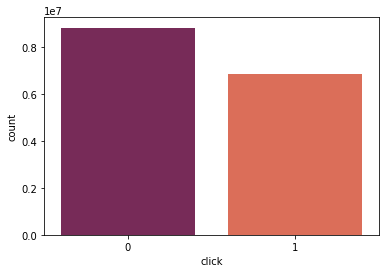

In [77]:
sns.countplot(eq_df['click'], palette="rocket")

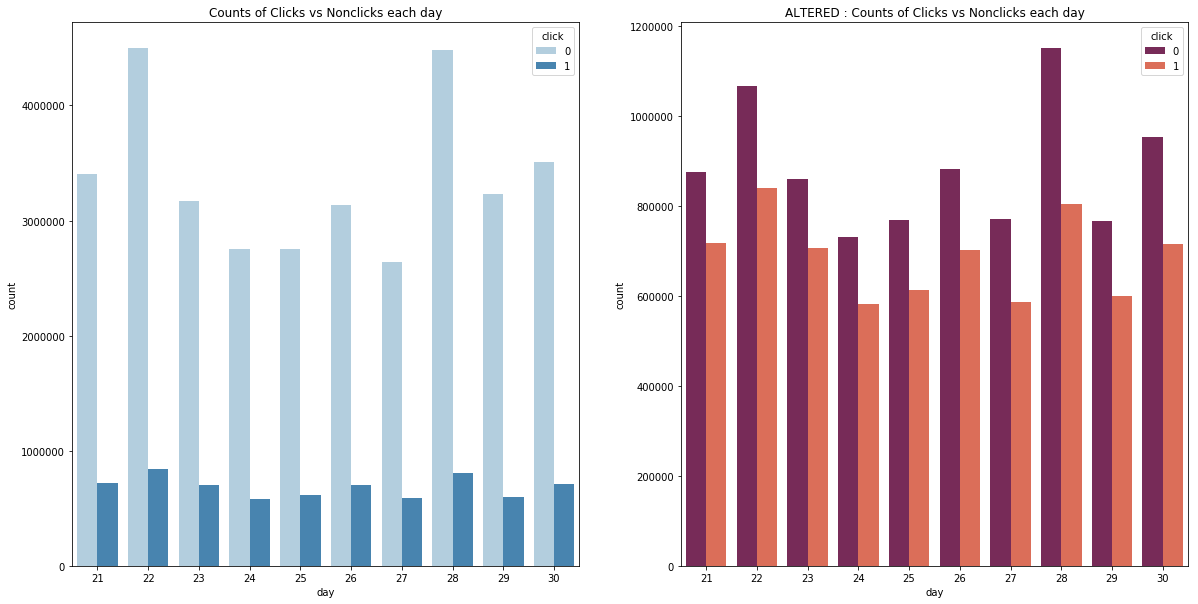

In [80]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Counts of Clicks vs Nonclicks each day')
sns.countplot(x="day", hue="click", data=df, palette="Blues")
plt.subplot(1,2,2)
plt.title('ALTERED : Counts of Clicks vs Nonclicks each day')
sns.countplot(x="day", hue="click", data=eq_df, palette="rocket")

In [81]:
eq_df.to_pickle('../../Data/Mobile/trainSample.pkl')